In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [30]:
res = pd.read_pickle('results/keras_artificial_classifier_ou.pkl')
results = [v for k, v in res.T.to_dict().items()]

In [31]:
res['max_accuracy'] = [np.array(r).max() for r in res['val_acc']]
epoch = lambda arr, th: np.argmax(arr >= th) + (np.inf if arr.max() < th else 0)
res['epochs2conv'] = [epoch(np.array(a), .5 + .999*(ta - .5)) for a, ta in zip(res['val_acc'], res['theoretical_accuracy'])]
res['best_epoch'] = [np.argmax(np.array(a)) for a in res['val_acc']]
res['train_accuracy'] = [ta if not hasattr(ta, '__len__') else np.array(ta)[e] for ta, e in zip(res['acc'], res['best_epoch'])]
res['dt'] = [dt.datetime.strptime(r, '%Y-%m-%dT%H:%M:%S.%f') for r in res['datetime']]

In [24]:
res = res[res['dt'] > dt.datetime(2016, 11, 11)]

In [32]:
res2 = res[res.groupby('ou_type')['epochs2conv'].transform(min) == res['epochs2conv']]
res2[['ou_type', 'theoretical_accuracy', 'max_accuracy', 'train_accuracy', 'dim', 'sample_size', 'lookback', 'epochs2conv']]

,ou_type,theoretical_accuracy,max_accuracy,train_accuracy,dim,sample_size,lookback,epochs2conv
106,pow2_sqrt16x10,0.532540,0.541016,0.529688,16,10000,100.0,1.000000
111,linear16x100,0.533036,0.544727,0.581250,16,1000,10.0,7.000000
112,pow2_sqrt16x10,0.529130,0.540039,0.524844,16,100000,10.0,1.000000
113,pow2_sqrt16x10,0.532440,0.541797,0.526563,16,10000,10.0,1.000000
115,sqrt_sqrt16x10,0.529640,0.541016,0.512656,16,100000,10.0,0.000000
118,sqrt16x10,0.513120,0.523437,0.517031,16,100000,10.0,0.000000
126,sqrt16x100,0.497321,0.521289,0.600000,16,1000,100.0,2.000000
130,linear16x10,0.997790,0.812305,0.883906,16,100000,100.0,inf
131,linear16x10,0.981250,0.868750,0.651562,16,10000,100.0,inf
132,linear16x10,0.862500,0.724609,0.768750,16,1000,100.0,inf


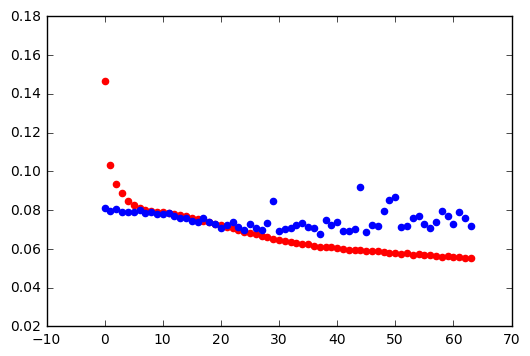

In [14]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
h = rr['loss_history']
ax.scatter(np.arange(len(h['train'])), h['train'], color='red')
ax.scatter(np.arange(len(h['train'])), h['valid'], color='blue')

In [18]:
np.argmax([False, False, True, False, True, False])

2

In [12]:
res.columns

Index(['X.shape', 'acc', 'activation', 'ahead', 'date', 'datetime', 'dim',
       'dropout', 'frequency', 'include_time', 'initialization', 'lag',
       'layer_size', 'layers', 'lookback', 'loss', 'mean_squared_error',
       'model_params', 'noiseSigma', 'noiseSigma0', 'optimizer', 'ou_type',
       'penalties', 'pretrain', 'sample_size', 'theoretical_R2',
       'theoretical_accuracy', 'training_time', 'val_acc', 'val_loss',
       'val_mean_squared_error', 'accuracy', 'epochs', 'train_accuracy', 'dt'],
      dtype='object')